In [7]:
setwd('/glade/work/alancelin/EVT_rossbypalooza/')
# install.packages('IRkernel')
# import R extreme value theory package
# install.packages("extRemes")
# install.packages("evd")
# install.packages("zoo")
install.packages("googledrive")
library(extRemes)
library(zoo)
library(evd)
library(googledrive)

Installing package into ‘/glade/u/home/alancelin/R/x86_64-conda-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



also installing the dependencies ‘sys’, ‘askpass’, ‘fs’, ‘openssl’, ‘rappdirs’, ‘rlang’, ‘curl’, ‘mime’, ‘vctrs’, ‘cli’, ‘lifecycle’, ‘gargle’, ‘httr’, ‘pillar’, ‘purrr’




ERROR: Error: package or namespace load failed for ‘googledrive’ in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace ‘rlang’ 1.0.2 is already loaded, but >= 1.1.0 is required


In [6]:
path_data = "data/train/A_tas_lat.34_lon.109_spatial.2_reduce.max.csv"
data = read.csv(path_data, header = TRUE)

In [56]:
# compute the T_days rolling mean of the data
T_days = 7
# import R zoo package
# install.packages("zoo")
A = rollmean(data$tas, T_days)
# set the time index
time = as.Date(data$time)
time = time[1:(length(time) - T_days + 1)]
# transform A to a data frame
A = data.frame(time, A)
# rename A by tas 
colnames(A) = c("A", "tas")
A

A,tas
<date>,<dbl>
11-01-17,268.9234
11-01-18,268.8066
11-01-19,268.7491
11-01-20,268.9070
11-01-21,269.3150
11-01-22,269.7626
11-01-23,270.1946
11-01-24,270.8992
11-01-25,271.7835


In [63]:
library(dplyr)
library(magrittr)
library(lubridate)

# Sample dataframe
# df <- data.frame(time = seq.Date(from = as.Date("2000-01-01"), to = as.Date("2020-12-31"), by = "day"),
#                  tas = rnorm(7671, mean = 15, sd = 10))

# Ensure your 'time' column is of Date type and extract the year
A <- A %>%
  mutate(time = as.Date(time),
         year = year(time))

# Compute annual maxima
annual_maxima <- A %>%
  group_by(year) %>%
  summarize(tas = max(tas, na.rm = TRUE))

# View the result
print(annual_maxima)

# A tibble: 2,090 × 2
    year   tas
   <dbl> <dbl>
 1    11  301.
 2    12  301.
 3    13  300.
 4    14  301.
 5    15  300.
 6    16  299.
 7    17  300.
 8    18  301.
 9    19  300.
10    20  302.
# … with 2,080 more rows


In [76]:
# make year being a time type
annual_maxima$year = as.Date(annual_maxima$year)
annual_maxima

year,tas
<date>,<dbl>
1970-01-12,301.1723
1970-01-13,301.1103
1970-01-14,299.8600
1970-01-15,300.9689
1970-01-16,299.8801
1970-01-17,299.4122
1970-01-18,300.4286
1970-01-19,301.0146
1970-01-20,299.7726


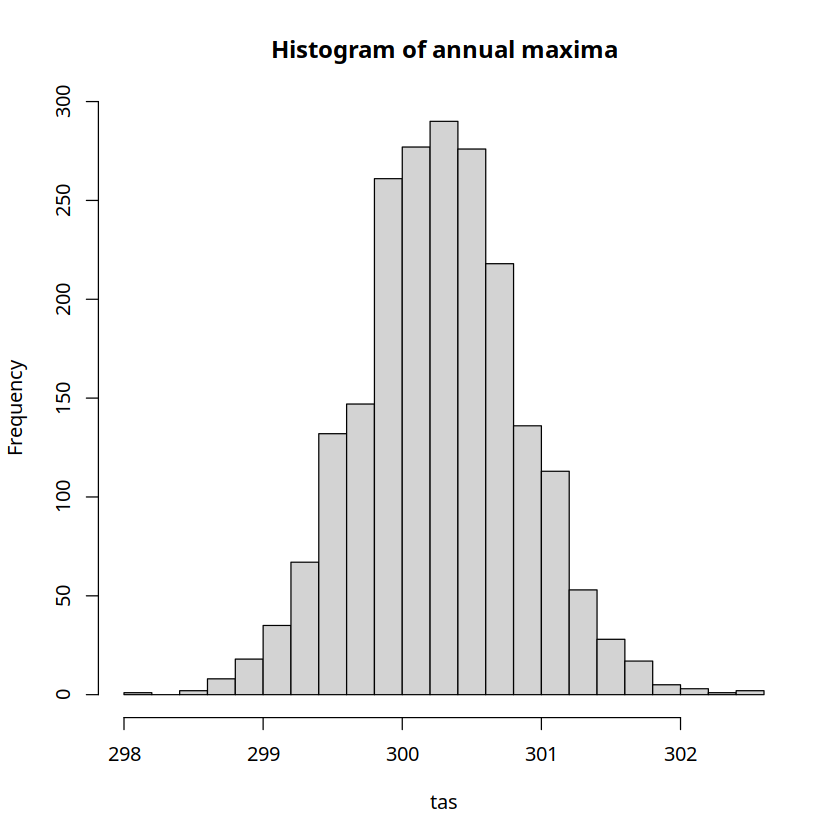

In [77]:
# annual_maxima
# plot a histogram of the annual maxima
hist(annual_maxima$tas, breaks = 20, main = "Histogram of annual maxima", xlab = "tas")

In [78]:
# Fit the GEV distribution
gev_fit <- fevd(annual_maxima$tas, type = "GEV")

# Print the summary of the fitted model
summary(gev_fit)

# Plot the fitted GEV distribution
return.level(gev_fit)

Warning message in fevd(annual_maxima$tas, type = "GEV"):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”



fevd(x = annual_maxima$tas, type = "GEV")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  7393.516 


 Estimated parameters:
  location      scale      shape 
223.480671 136.167111  -1.721571 

 Standard Error Estimates:
    location        scale        shape 
2.000001e-08 2.000001e-08 2.000001e-08 

 Estimated parameter covariance matrix.
              location         scale         shape
location  4.000003e-16 -4.537226e-26 -3.848886e-26
scale    -4.537226e-26  4.000003e-16 -2.299176e-26
shape    -3.848886e-26 -2.299176e-26  4.000003e-16

 AIC = 14793.03 

 BIC = 14809.97 


fevd(x = annual_maxima$tas, type = "GEV")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period)

 GEV model fitted to  annual_maxima$tas  
Data are assumed to be  stationary 
[1] "Return Levels for period units in years"
  2-year level  20-year level 100-year level 
      260.4914       302.0995       302.5466 

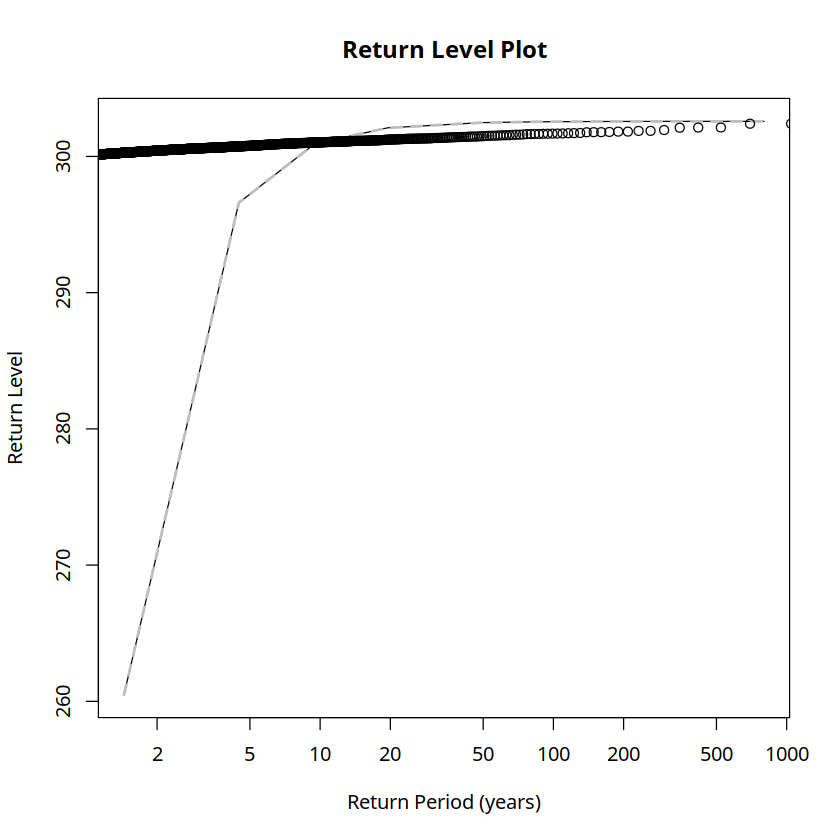

In [81]:
# plot the return level curve along with the 95% confidence interval
plot(gev_fit, type = "rl", main = "Return Level Plot")

ERROR: Error in return_levels_ci[, 2]: incorrect number of dimensions


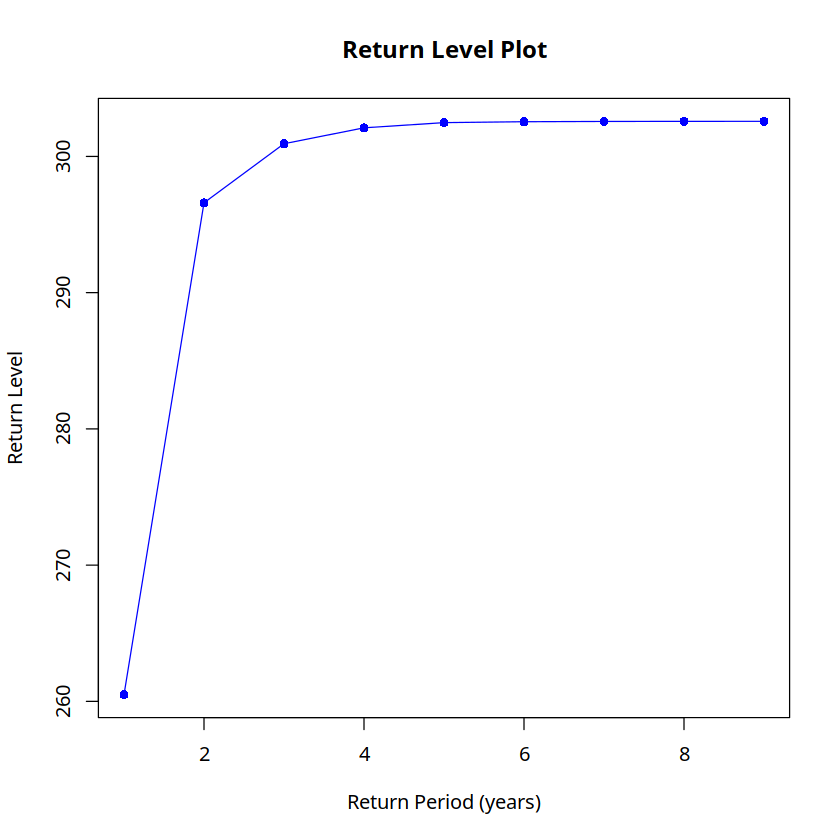

In [85]:
# Calculate return levels
return_periods <- c(2, 5, 10, 20, 50, 100, 200, 500, 1000)
return_levels <- return.level(gev_fit, return.period = return_periods)

# Plot return levels
plot(return_levels, type = "o", main = "Return Level Plot",
     xlab = "Return Period (years)", ylab = "Return Level",
     col = "blue", pch = 16)

# Add the 95% confidence interval
return_levels_ci <- return.level(gev_fit, return.period = return_periods, ci = TRUE)
lines(return_periods, return_levels_ci[, 2], col = "red", lty = 2)
lines(return_periods, return_levels_ci[, 3], col = "red", lty = 2)   

In [87]:
fit <- fevd(annual_maxima$tas)


Warning message in fevd(annual_maxima$tas):
“fevd: L-moments and Moment initial parameter estimates could not be calculated.  Using arbitrary starting values.”


Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”
Warning message in log(z):
“NaNs produced”


Warning message in plot.xy(xy, type, ...):
“plot type 'rl' will be truncated to first character”


ERROR: Error in plot.xy(xy, type, ...): invalid plot type 'r'


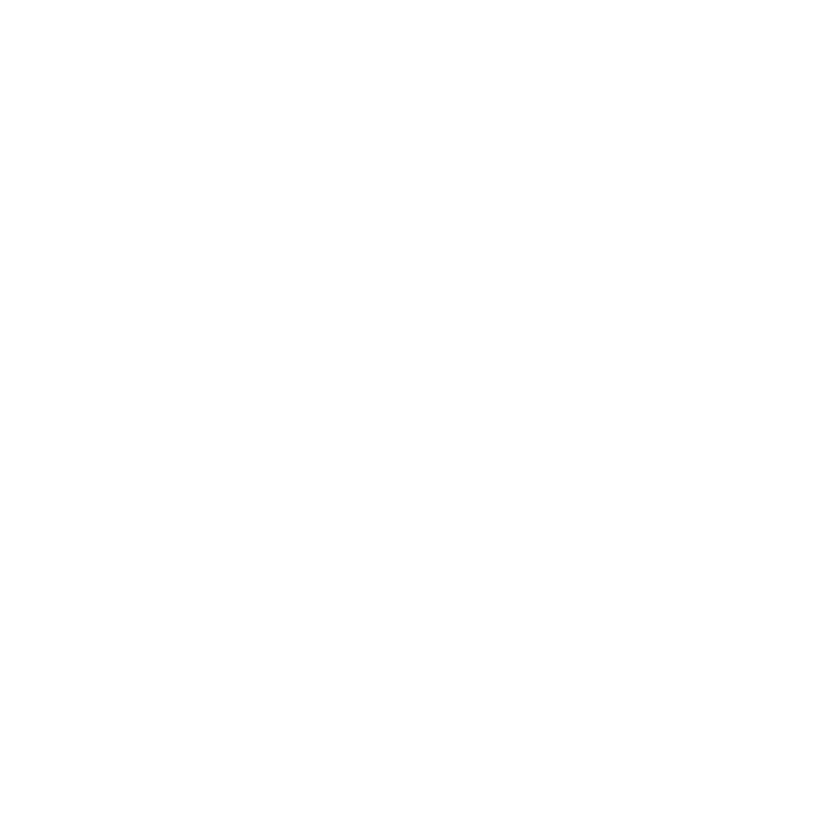

In [91]:
return_lev_with_ci = ci.fevd(fit, alpha = 0.05, type = "return.level", return.period = return_periods, method = "normal")
# plot the return level curve along with the 95% confidence interval
plot(return_lev_with_ci, type = "rl", main = "Return Level Plot")

In [89]:
return_lev_with_ci

fevd(x = annual_maxima$tas)

[1] "Normal Approx."

                       95% lower CI Estimate 95% upper CI
2-year return level        260.4914 260.4914     260.4914
5-year return level        296.5955 296.5955     296.5955
10-year return level       300.9324 300.9324     300.9324
20-year return level       302.0995 302.0995     302.0995
50-year return level       302.4797 302.4797     302.4797
100-year return level      302.5466 302.5466     302.5466
200-year return level      302.5667 302.5667     302.5667
500-year return level      302.5736 302.5736     302.5736
1000-year return level     302.5748 302.5748     302.5748


In [90]:
?plot.fevd

fevd                 package:extRemes                  R Documentation

_F_i_t _A_n _E_x_t_r_e_m_e _V_a_l_u_e _D_i_s_t_r_i_b_u_t_i_o_n (_E_V_D) _t_o _D_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Fit a univariate extreme value distribution functions (e.g., GEV,
     GP, PP, Gumbel, or Exponential) to data; possibly with covariates
     in the parameters.

_U_s_a_g_e:

     fevd(x, data, threshold = NULL, threshold.fun = ~1, location.fun = ~1,
         scale.fun = ~1, shape.fun = ~1, use.phi = FALSE,
         type = c("GEV", "GP", "PP", "Gumbel", "Exponential"),
         method = c("MLE", "GMLE", "Bayesian", "Lmoments"), initial = NULL,
         span, units = NULL, time.units = "days", period.basis = "year",
         na.action = na.fail, optim.args = NULL, priorFun = NULL,
         priorParams = NULL, proposalFun = NULL, proposalParams = NULL,
         iter = 9999, weights = 1, blocks = NULL, verbose = FALSE)
     
     ## S3 method for cla